<a href="https://colab.research.google.com/github/miftahudinfaiz/BDDM/blob/main/BD%26DM_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 5 - Feature Selection

Feature selection atau seleksi fitur adalah salah satu teknik penting dan sering digunakan dalam tahap pre-processing. Teknik ini mengurangi jumlah fitur yang terlibat dalam menentukan suatu nilai kelas target. Fitur yang diabaikan biasanya berupa fitur yang tidak relevan dan data berlebih. Tujuan utama dari seleksi fitur ialah memilih fitur terbaik dari suatu kumpulan data fitur.

**Metode Feature Selection**
1. Filter Method
2. Wrapper Method
3. Embedded Method

###Load Dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/StudentPerformance .csv')
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,status_menikah,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,kacamata,gamer,durasi_sosmed (jam/hari),jumlah_akun_sosmed,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,Pria,19,Informatika,Pemrograman,Yogyakarta,Tidak,200000,50000,Motor,Ya,ASUS,Tidak,4.00,3.9,3.75,3.80,97,Tidak,Ya,2,1,Tidak,2,92,3,Tidak,Ya,41,170,3.86,Ya
1,2,Siti Muniroh,Wanita,19,Informatika,Jaringan,Jakarta,Ya,500000,70000,Mobil,Ya,MacBook,Ya,4.00,4.0,3.90,3.95,89,Ya,Tidak,3,1,Tidak,1,94,0,Tidak,Tidak,38,150,3.96,Ya
2,3,Achmad Sandi,Pria,19,Informatika,Multimedia,Yogyakarta,Tidak,300000,100000,Motor,Ya,Acer,Tidak,3.90,3.6,3.70,3.50,97,Tidak,Ya,3,1,Tidak,1,90,3,Tidak,Ya,42,172,3.68,Tidak
3,4,Adam Sautin,Pria,21,Informatika,Jaringan,Yogyakarta,Tidak,700000,100000,Sepeda,Ya,Lenovo,Tidak,4.00,3.6,3.50,3.65,97,Tidak,Ya,1,1,Tidak,2,93,2,Tidak,Ya,41,168,3.69,Tidak
4,5,Ade R. S1rief,Pria,19,Informatika,Multimedia,Surabaya,Ya,800000,80000,Mobil,Ya,Macbook,Tidak,3.85,3.7,3.50,3.65,94,Tidak,Tidak,2,1,Tidak,2,112,3,Tidak,Ya,40,164,3.68,Tidak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

###Pre-processing Data

####Encoding
Digunakan untuk mengubah string kategori ke dalam bentuk numerik, hasil encoding secara otomatis dilakukan berdasarkan urutan alfabet string kategori tersebut

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encode otomatis
# pembuatan instance labelencoder
le = LabelEncoder()

cols =['konsentrasi','asal','kendaraan','tipe_laptop',
                  'jenis_kelamin', 'kos', 'laptop','status_menikah',
                  'kacamata','gamer','clubbing','keadaan_ortu_divorced',
                  'romance','lulus_tepatwaktu']

for col in cols:
    df[col]=le.fit_transform(df[col])


df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,status_menikah,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,kacamata,gamer,durasi_sosmed (jam/hari),jumlah_akun_sosmed,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,0,19,Informatika,2,12,0,200000,50000,1,1,1,0,4.00,3.9,3.75,3.80,97,0,1,2,1,0,2,92,3,0,1,41,170,3.86,1
1,2,Siti Muniroh,1,19,Informatika,0,3,1,500000,70000,0,1,6,1,4.00,4.0,3.90,3.95,89,1,0,3,1,0,1,94,0,0,0,38,150,3.96,1
2,3,Achmad Sandi,0,19,Informatika,1,12,0,300000,100000,1,1,2,0,3.90,3.6,3.70,3.50,97,0,1,3,1,0,1,90,3,0,1,42,172,3.68,0
3,4,Adam Sautin,0,21,Informatika,0,12,0,700000,100000,2,1,5,0,4.00,3.6,3.50,3.65,97,0,1,1,1,0,2,93,2,0,1,41,168,3.69,0
4,5,Ade R. S1rief,0,19,Informatika,1,11,1,800000,80000,0,1,7,0,3.85,3.7,3.50,3.65,94,0,0,2,1,0,2,112,3,0,1,40,164,3.68,0


####Drop Columns

In [ ]:
#drop kolom yang memiliki tipe data object
columns = ['id_mhs', 'nama', 'jurusan']
df.drop(columns, inplace=True, axis=1)

##1. Filter Method

###Pearson Correlation

Analisis korelasi adalah teknik analisis yang digunakan untuk mengukur kuat lemahnya hubungan dua variabel. Variabel ini terdiri dari variabel bebas dan tergantung. Besarnya hubungan berkisar antara 0-1. Jika mendekati angka 1 berarti hubungan kedua variabel semakin kuat, demikian juga sebaliknya jika mendekati angka 0 berarti hubungan kedua variabel semakin lemah. Dalam scikit-learn korelasi Pearson dilakukan dengan memanggil fungsi corr().

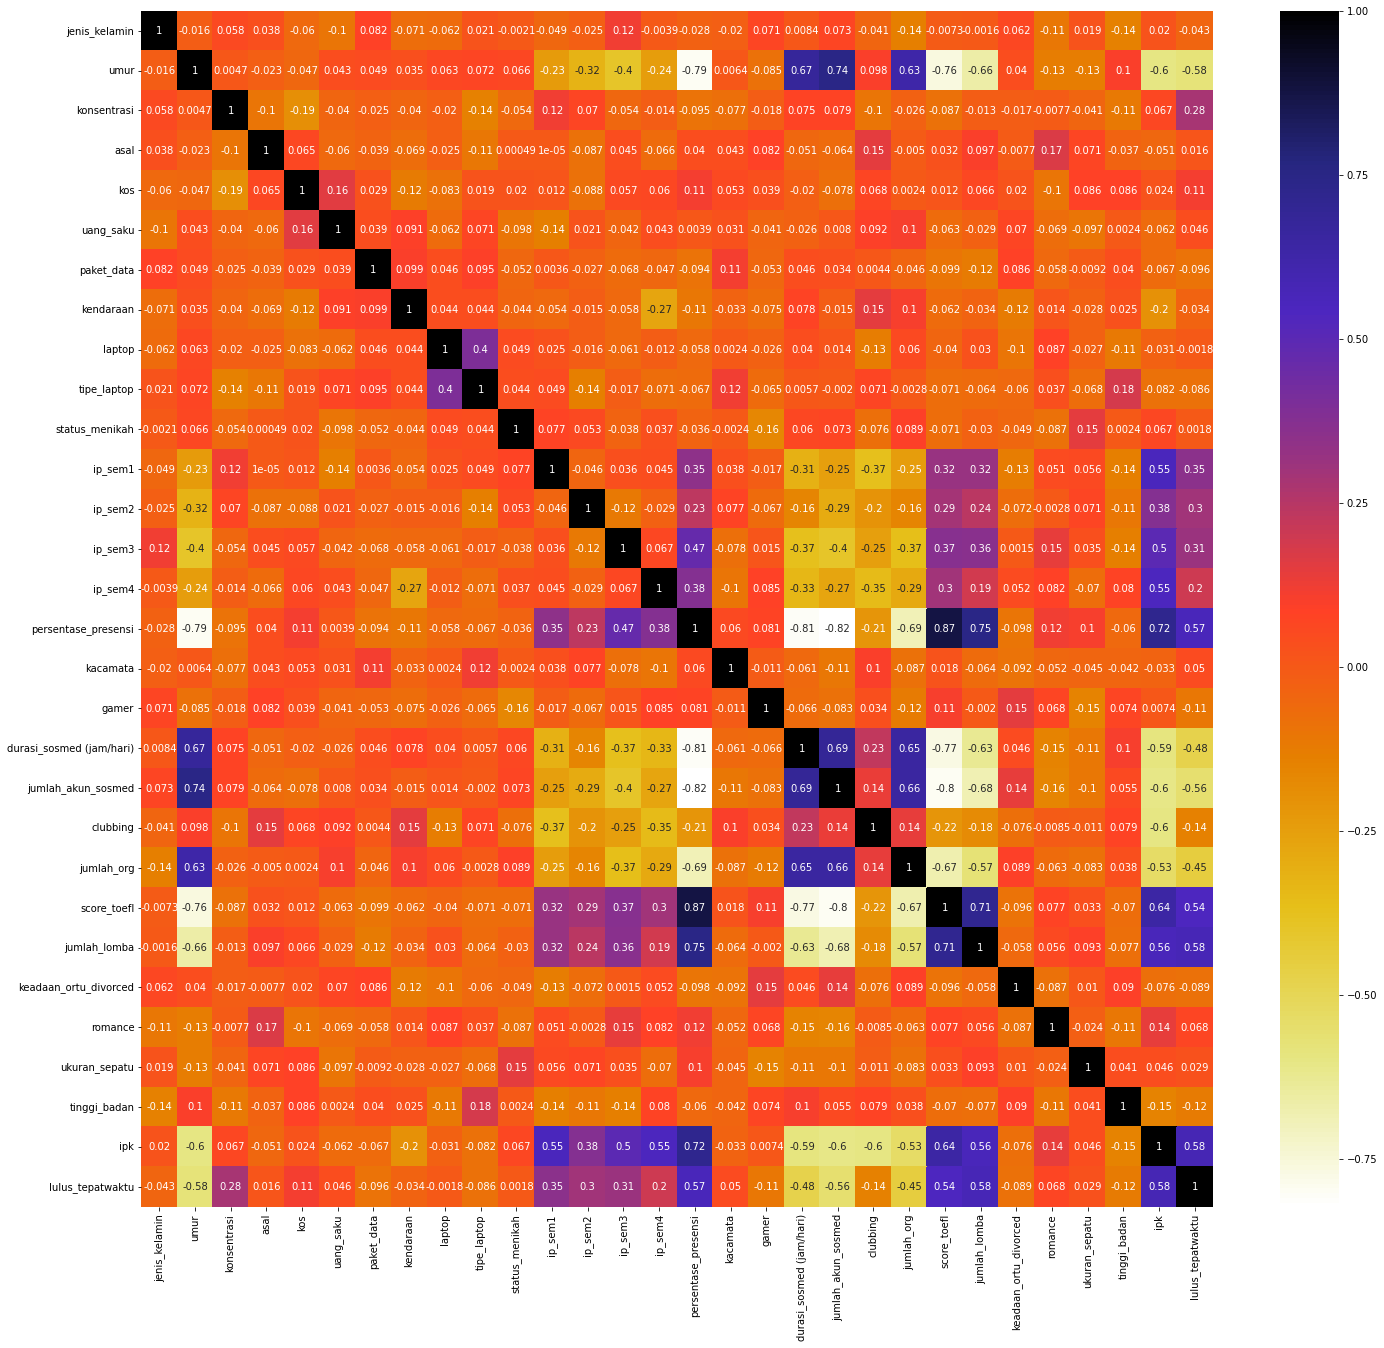

In [ ]:
import numpy as np
import seaborn as sns #menampilkan matrik korelasi dalam grafik heatmap dengan menggunakan library Seaborn.
import matplotlib.pyplot as plt

cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [ ]:
#Correlation with output variable
cor_target = abs(cor['ipk'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

umur                   0.600057
persentase_presensi    0.715748
jumlah_akun_sosmed     0.604844
score_toefl            0.640401
ipk                    1.000000
Name: ipk, dtype: float64

In [ ]:
print(df[["umur","persentase_presensi"]].corr())
print('\n',df[["umur","jumlah_akun_sosmed"]].corr())
print('\n',df[["umur","score_toefl"]].corr())
print('\n',df[["persentase_presensi","jumlah_akun_sosmed"]].corr())
print('\n',df[["persentase_presensi","score_toefl"]].corr())
print('\n',df[["jumlah_akun_sosmed","score_toefl"]].corr())

                         umur  persentase_presensi
umur                 1.000000            -0.794927
persentase_presensi -0.794927             1.000000

                         umur  jumlah_akun_sosmed
umur                1.000000            0.744678
jumlah_akun_sosmed  0.744678            1.000000

                 umur  score_toefl
umur         1.00000     -0.76448
score_toefl -0.76448      1.00000

                      persentase_presensi  jumlah_akun_sosmed
persentase_presensi             1.000000           -0.822861
jumlah_akun_sosmed             -0.822861            1.000000

                      persentase_presensi  score_toefl
persentase_presensi             1.000000     0.872809
score_toefl                     0.872809     1.000000

                     jumlah_akun_sosmed  score_toefl
jumlah_akun_sosmed            1.000000    -0.796084
score_toefl                  -0.796084     1.000000


##2. Wrapper Method
Metode wrapper membutuhkan satu jenis algoritma Machine Learning dan menggunakan kinerjanya sebagai kriteria evaluasi. Metode ini mencari fitur yang paling cocok untuk algoritma Machine Learning dan bertujuan untuk meningkatkan kinerja algoritma. 

###Forward Selection

Metode seleksi berulang yang dimulai dengan fitur kosong pada model. Dalam setiap iterasi atau perulangan, kita menambahkan fitur yang memiliki pengaruh paling signifikan dalam meningkatkan model yang kita miliki. Kemudian dilanjutkan dengan penambahan variabel baru yang tidak meningkatkan kinerja model.

Langkah-langkah teknik Forward Selection adalah sebagai berikut :

1. Pilih tingkat signifikansi (misalnya SL = 0,05 dengan kepercayaan 95%).

2. Sesuaikan semua kemungkinan model regresi sederhana dengan mempertimbangkan satu fitur pada satu waktu. Model total 'n' dimungkinkan. Pilih fitur dengan nilai p terendah.

3. Sesuaikan semua model yang memungkinkan dengan satu fitur tambahan yang ditambahkan ke fitur yang dipilih sebelumnya.

4. Sekali lagi, pilih fitur dengan nilai p minimum. jika p_value < tingkat signifikansi maka lanjutkan ke Langkah 3, jika tidak hentikan prose

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
X = df.drop("ipk",1)   #Feature Matrix
y = df["ipk"]          #Target Variable

In [43]:
import statsmodels.api as sm

In [44]:
def forward_selection(data, target, significance_level=0.05): #Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    initial_features = data.columns.tolist() #convert kolom ke dalam bentuk list
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [45]:
forward_selection(X,y)

['persentase_presensi',
 'clubbing',
 'lulus_tepatwaktu',
 'ip_sem4',
 'ip_sem1',
 'ip_sem2',
 'ip_sem3']

###Backward Elimination

Berkebalikan dengan metode forward selection, pada metode ini model berisi semua fitur. Kemudian pada setiap iterasi atau perulangan dilakukan penghapusan fitur yang tidak meningkatkan kinerja model secara signifikan. Kita mengulangi proses ini sampai model berisi fitur yang ideal, ditandai dengan tidak ada perubahan yang ditemukan ketika dilakukan penghapusan fitur.

In [46]:
def backward_elimination(data, target,significance_level = 0.05): #Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [47]:
backward_elimination(X,y)

['ip_sem1', 'ip_sem2', 'ip_sem3', 'ip_sem4', 'persentase_presensi', 'clubbing']

##3. Embedded Method
Metode embedded selector adalah metode seleksi fitur yang menggabungkan keunggulan metode filter dan metode wrapper. Metode ini menggunakan algoritma tertentu seperti Random Forest dan Lasso Regression

###Random Forest Importance


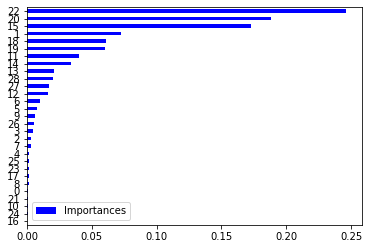

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

model.fit(X,y)

importances = model.feature_importances_

result_df = pd.DataFrame({'Features':pd.DataFrame(X).columns,'Importances':importances})
result_df.set_index('Importances')

result_df = result_df.sort_values('Importances')
result_df.plot.barh(color = 'blue')

In [ ]:
result_df

,Features,Importances
16,kacamata,0.000207
24,keadaan_ortu_divorced,0.000527
10,status_menikah,0.000548
21,jumlah_org,0.000638
0,jenis_kelamin,0.000703
8,laptop,0.001469
17,gamer,0.001490
23,jumlah_lomba,0.001611
25,romance,0.001621
4,kos,0.001829


###Lasso Regression

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
#Pipeline untuk menggabungkan serangkaian tranformasi data linier
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
#Mengoptimalkan α (alpha) hyperparameter di Lasso Regression
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X,y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.043 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.020 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.021 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.019 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.013 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.043 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.023 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.024 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.022 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.016 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.043 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01378002, -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01378002, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
features = X.columns

In [ ]:
np.array(features)[importance > 0]

array(['persentase_presensi'], dtype=object)

In [ ]:
np.array(features)[importance == 0]

array(['jenis_kelamin', 'umur', 'konsentrasi', 'asal', 'kos', 'uang_saku',
       'paket_data', 'kendaraan', 'laptop', 'tipe_laptop',
       'status_menikah', 'ip_sem1', 'ip_sem2', 'ip_sem3', 'ip_sem4',
       'kacamata', 'gamer', 'durasi_sosmed (jam/hari)',
       'jumlah_akun_sosmed', 'clubbing', 'jumlah_org', 'score_toefl',
       'jumlah_lomba', 'keadaan_ortu_divorced', 'romance',
       'ukuran_sepatu', 'tinggi_badan', 'lulus_tepatwaktu'], dtype=object)

#Tugas
Lakukan feature selection dengan target selain 'ipk' menggunakan tiga metode :  Filter, Wrapper, dan Embedding. 

Pilih salah satu cara untuk masing-masing metode

Lakukan analisis hasilnya

#Referensi

- https://www.naukri.com/learning/articles/feature-selection-techniques-python-code/
- https://www.datalearns247.com/feature-selection-menggunakan-scikit-learn-71
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a
- https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/
- https://www.trivusi.web.id/2019/02/metode-metode-dalam-feature-selection.html

###Nama  : Miftahudin Faiz
###NIM   : 20.11.3675
###Kelas : 20-S1-IF-07

#Import

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/miftahudinfaiz/BDDM/main/StudentPerformance%20.csv")
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,Pria,19,Informatika,Pemrograman,Yogyakarta,Tidak,200000,50000,...,Tidak,2,92,3,Tidak,Ya,41,170,3.86,Ya
1,2,Siti Muniroh,Wanita,19,Informatika,Jaringan,Jakarta,Ya,500000,70000,...,Tidak,1,94,0,Tidak,Tidak,38,150,3.96,Ya
2,3,Achmad Sandi,Pria,19,Informatika,Multimedia,Yogyakarta,Tidak,300000,100000,...,Tidak,1,90,3,Tidak,Ya,42,172,3.68,Tidak
3,4,Adam Sautin,Pria,21,Informatika,Jaringan,Yogyakarta,Tidak,700000,100000,...,Tidak,2,93,2,Tidak,Ya,41,168,3.69,Tidak
4,5,Ade R. S1rief,Pria,19,Informatika,Multimedia,Surabaya,Ya,800000,80000,...,Tidak,2,112,3,Tidak,Ya,40,164,3.68,Tidak


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

#Data Pre-processing

Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

#Dictionary to store the data
convert_dict = {
    'konsentrasi' : 'category',
    'asal' : 'category',
    'kendaraan' : 'category',
    'tipe_laptop' : 'category',
}

#Convert data types
df = df.astype(convert_dict)

#Labelencoder instance
labelencoder = LabelEncoder()

#Assigning numerical and storing in another column
df['konsentrasi'] = labelencoder.fit_transform(df['konsentrasi'])
df['asal'] = labelencoder.fit_transform(df['asal'])
df['kendaraan'] = labelencoder.fit_transform(df['kendaraan'])
df['tipe_laptop'] = labelencoder.fit_transform(df['tipe_laptop'])



In [10]:
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,Pria,19,Informatika,2,12,Tidak,200000,50000,...,Tidak,2,92,3,Tidak,Ya,41,170,3.86,Ya
1,2,Siti Muniroh,Wanita,19,Informatika,0,3,Ya,500000,70000,...,Tidak,1,94,0,Tidak,Tidak,38,150,3.96,Ya
2,3,Achmad Sandi,Pria,19,Informatika,1,12,Tidak,300000,100000,...,Tidak,1,90,3,Tidak,Ya,42,172,3.68,Tidak
3,4,Adam Sautin,Pria,21,Informatika,0,12,Tidak,700000,100000,...,Tidak,2,93,2,Tidak,Ya,41,168,3.69,Tidak
4,5,Ade R. S1rief,Pria,19,Informatika,1,11,Ya,800000,80000,...,Tidak,2,112,3,Tidak,Ya,40,164,3.68,Tidak


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    int64  
 6   asal                      150 non-null    int64  
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    int64  
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    int64  
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

In [12]:
#Encoding columns
num_kelamin = {
    'Pria' : 0,
    'Wanita' : 1
}

num_ya_tidak = {
    'Tidak' : 0,
    'Ya' : 1
}

df['jenis_kelamin'] = df['jenis_kelamin'].map(num_kelamin)
df['kos'] = df['kos'].map(num_ya_tidak)
df['laptop'] = df['laptop'].map(num_ya_tidak)
df['status_menikah'] = df['status_menikah'].map(num_ya_tidak)
df['kacamata'] = df['kacamata'].map(num_ya_tidak)
df['gamer'] = df['gamer'].map(num_ya_tidak)
df['clubbing'] = df['clubbing'].map(num_ya_tidak)
df['keadaan_ortu_divorced'] = df['keadaan_ortu_divorced'].map(num_ya_tidak)
df['romance'] = df['romance'].map(num_ya_tidak)
df['lulus_tepatwaktu'] = df['lulus_tepatwaktu'].map(num_ya_tidak)

In [13]:
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,0,19,Informatika,2,12,0,200000,50000,...,0,2,92,3,0,1,41,170,3.86,1
1,2,Siti Muniroh,1,19,Informatika,0,3,1,500000,70000,...,0,1,94,0,0,0,38,150,3.96,1
2,3,Achmad Sandi,0,19,Informatika,1,12,0,300000,100000,...,0,1,90,3,0,1,42,172,3.68,0
3,4,Adam Sautin,0,21,Informatika,0,12,0,700000,100000,...,0,2,93,2,0,1,41,168,3.69,0
4,5,Ade R. S1rief,0,19,Informatika,1,11,1,800000,80000,...,0,2,112,3,0,1,40,164,3.68,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    int64  
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    int64  
 6   asal                      150 non-null    int64  
 7   kos                       150 non-null    int64  
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    int64  
 11  laptop                    150 non-null    int64  
 12  tipe_laptop               150 non-null    int64  
 13  status_menikah            150 non-null    int64  
 14  ip_sem1   

Drop Column

In [15]:
#Dropping column that still have object data types
columns = ['id_mhs', 'nama', 'jurusan']
df.drop(columns, inplace=True, axis=1)

In [16]:
df.head()

,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,0,19,2,12,0,200000,50000,1,1,1,...,0,2,92,3,0,1,41,170,3.86,1
1,1,19,0,3,1,500000,70000,0,1,6,...,0,1,94,0,0,0,38,150,3.96,1
2,0,19,1,12,0,300000,100000,1,1,2,...,0,1,90,3,0,1,42,172,3.68,0
3,0,21,0,12,0,700000,100000,2,1,5,...,0,2,93,2,0,1,41,168,3.69,0
4,0,19,1,11,1,800000,80000,0,1,7,...,0,2,112,3,0,1,40,164,3.68,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jenis_kelamin             150 non-null    int64  
 1   umur                      150 non-null    int64  
 2   konsentrasi               150 non-null    int64  
 3   asal                      150 non-null    int64  
 4   kos                       150 non-null    int64  
 5   uang_saku                 150 non-null    int64  
 6   paket_data                150 non-null    int64  
 7   kendaraan                 150 non-null    int64  
 8   laptop                    150 non-null    int64  
 9   tipe_laptop               150 non-null    int64  
 10  status_menikah            150 non-null    int64  
 11  ip_sem1                   150 non-null    float64
 12  ip_sem2                   150 non-null    float64
 13  ip_sem3                   150 non-null    float64
 14  ip_sem4   

#Filter Method

Pearson Correlation

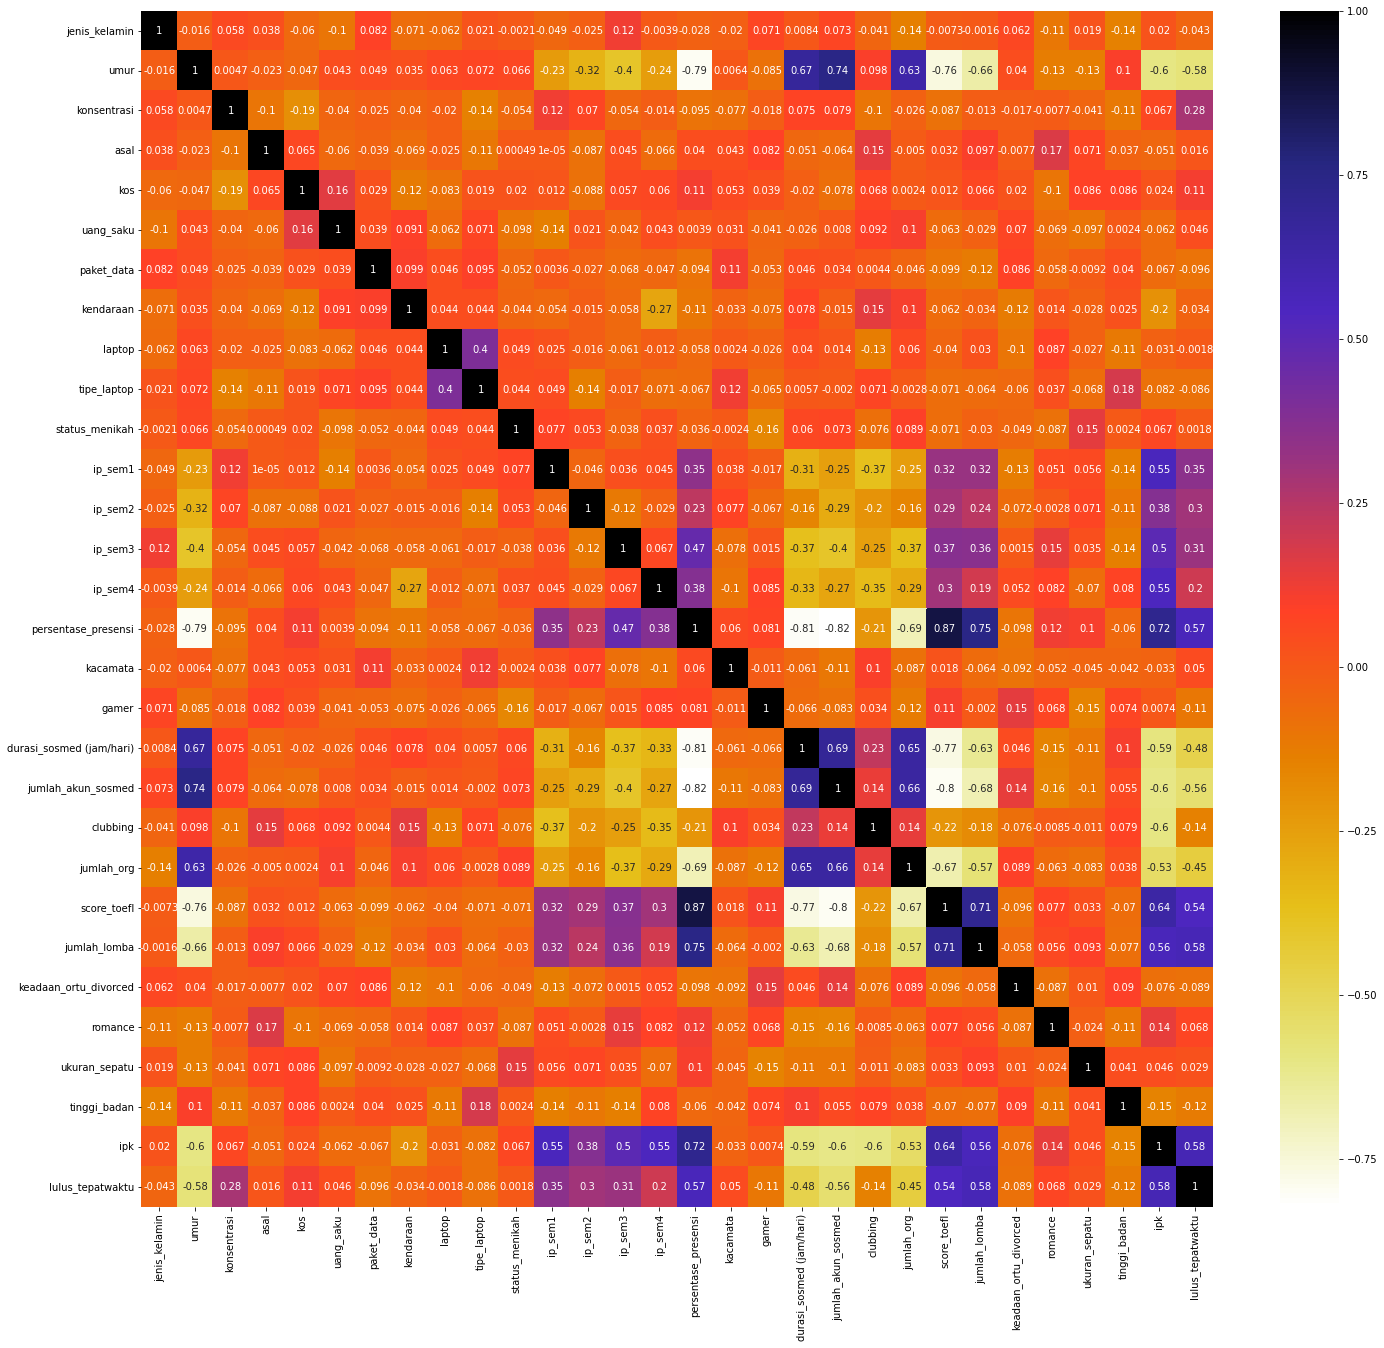

In [20]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [21]:
#Correlation with output variable
cor_target = abs(cor['score_toefl'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

umur                        0.764480
persentase_presensi         0.872809
durasi_sosmed (jam/hari)    0.766995
jumlah_akun_sosmed          0.796084
score_toefl                 1.000000
jumlah_lomba                0.709745
Name: score_toefl, dtype: float64

In [23]:
print(df[["umur","persentase_presensi"]].corr())
print('\n', df[["umur","durasi_sosmed (jam/hari)"]].corr())
print('\n', df[["umur","jumlah_akun_sosmed"]].corr())
print('\n', df[["umur","jumlah_lomba"]].corr())
print('\n', df[["persentase_presensi","durasi_sosmed (jam/hari)"]].corr())
print('\n', df[["persentase_presensi","jumlah_akun_sosmed"]].corr())
print('\n', df[["persentase_presensi","jumlah_lomba"]].corr())
print('\n', df[["durasi_sosmed (jam/hari)","jumlah_akun_sosmed"]].corr())
print('\n', df[["durasi_sosmed (jam/hari)","jumlah_lomba"]].corr())
print('\n', df[["jumlah_akun_sosmed","jumlah_lomba"]].corr())

                         umur  persentase_presensi
umur                 1.000000            -0.794927
persentase_presensi -0.794927             1.000000

                               umur  durasi_sosmed (jam/hari)
umur                      1.000000                  0.674638
durasi_sosmed (jam/hari)  0.674638                  1.000000

                         umur  jumlah_akun_sosmed
umur                1.000000            0.744678
jumlah_akun_sosmed  0.744678            1.000000

                   umur  jumlah_lomba
umur          1.000000     -0.659181
jumlah_lomba -0.659181      1.000000

                           persentase_presensi  durasi_sosmed (jam/hari)
persentase_presensi                  1.000000                 -0.805355
durasi_sosmed (jam/hari)            -0.805355                  1.000000

                      persentase_presensi  jumlah_akun_sosmed
persentase_presensi             1.000000           -0.822861
jumlah_akun_sosmed             -0.822861            1.0000

#Wrapper Method

Forward Selection

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
x = df.drop("score_toefl",1)  #Feature Matrix
y = df["score_toefl"]         #Target Variable

In [27]:
import statsmodels.api as sm

In [28]:
def forward_selection(data, target, significance_level=0.05): #Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    initial_features = data.columns.tolist()                  #Convert columns into list form
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [29]:
forward_selection(x,y)

['persentase_presensi',
 'jumlah_akun_sosmed',
 'durasi_sosmed (jam/hari)',
 'umur']

#Embedding Method

Lasso Regression

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [31]:
#Pipeline untuk menggabungkan serangkaian tranformasi data linier
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [32]:
#Mengoptimalkan α (alpha) hyperparameter di Lasso Regression
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [34]:
search.fit(x,y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-198.469 total time=   0.1s
[CV 2/5] END ...............model__alpha=0.1;, score=-168.057 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.1;, score=-148.076 total time=   0.1s
[CV 4/5] END ...............model__alpha=0.1;, score=-143.415 total time=   0.0s
[CV 5/5] END ...............model__alpha=0.1;, score=-169.775 total time=   0.0s
[CV 1/5] END ...............model__alpha=0.2;, score=-191.609 total time=   0.0s
[CV 2/5] END ...............model__alpha=0.2;, score=-160.459 total time=   0.1s
[CV 3/5] END ...............model__alpha=0.2;, score=-142.566 total time=   0.1s
[CV 4/5] END ...............model__alpha=0.2;, score=-136.238 total time=   0.0s
[CV 5/5] END ...............model__alpha=0.2;, score=-167.926 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-184.598 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [35]:
search.best_params_

{'model__alpha': 1.6}

In [36]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([ 0.        , -2.10904705, -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.26311205, -0.        ,  0.        ,
       11.03656474, -0.        ,  0.        , -2.75330723, -3.58159834,
       -0.        , -0.74809009,  1.02743434, -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ])

In [37]:
importance = np.abs(coefficients)
importance

array([ 0.        ,  2.10904705,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.26311205,  0.        ,  0.        ,
       11.03656474,  0.        ,  0.        ,  2.75330723,  3.58159834,
        0.        ,  0.74809009,  1.02743434,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [38]:
features = x.columns

In [39]:
np.array(features)[importance > 0]

array(['umur', 'ip_sem2', 'persentase_presensi',
       'durasi_sosmed (jam/hari)', 'jumlah_akun_sosmed', 'jumlah_org',
       'jumlah_lomba'], dtype=object)

In [40]:
np.array(features)[importance == 0]

array(['jenis_kelamin', 'konsentrasi', 'asal', 'kos', 'uang_saku',
       'paket_data', 'kendaraan', 'laptop', 'tipe_laptop',
       'status_menikah', 'ip_sem1', 'ip_sem3', 'ip_sem4', 'kacamata',
       'gamer', 'clubbing', 'keadaan_ortu_divorced', 'romance',
       'ukuran_sepatu', 'tinggi_badan', 'ipk', 'lulus_tepatwaktu'],
      dtype=object)

#GitHub

https://github.com/miftahudinfaiz/BDDM